In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Explore Shapefiles

In [2]:
import os
import rasterio
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

from config import raw_data_dir, interim_data_dir
from src.utils import read_shapefile

In [3]:
shp_train = read_shapefile('train')
shp_train['dataset'] = 'train'
shp_train.head(10)

,Area,Subregion,Crop_Id_Ne,geometry,dataset
Field_Id,,,,,
1,0.915905,3,8,"POLYGON ((613924.3324000851 6793991.295069702,...",train
2,2.064410,3,6,"POLYGON ((614404.0717397591 6794020.579634549,...",train
3,1.080300,3,8,"POLYGON ((614320.2146632321 6793964.242091182,...",train
4,1.316190,3,8,"POLYGON ((614560.5326844405 6794002.249461887,...",train
7,5.529220,3,8,"POLYGON ((614596.6564746551 6794269.865436315,...",train
8,1.482710,3,8,"POLYGON ((614593.073283543 6794503.419871029, ...",train
9,4.622840,3,8,"POLYGON ((614196.4868975078 6794344.478450645,...",train
11,1.018820,3,8,"POLYGON ((614618.2041435272 6794524.489676334,...",train
12,1.796070,3,8,"POLYGON ((614558.9018551795 6794772.778207108,...",train


In [4]:
shp_test = read_shapefile('test')
shp_test['dataset'] = 'test'
shp_test.head()

,Area,Subregion,geometry,dataset
Field_Id,,,,
5,1.322590,3,"POLYGON ((614428.5851635702 6794207.23529591, ...",test
6,0.955864,3,"POLYGON ((614617.1386412303 6794163.687688111,...",test
10,11.509800,3,"POLYGON ((614352.4574846183 6794416.783909474,...",test
18,2.697520,3,"POLYGON ((587079.1386775962 6809196.166975806,...",test
23,4.238030,3,"POLYGON ((587292.0585372676 6809495.257391035,...",test


In [5]:
shp_df = pd.concat([shp_train.drop('Crop_Id_Ne', axis=1), shp_test], axis=0).sort_index()

shapes = shp_df.geometry
print(shp_df.shape)
shp_df.head(20)

(3568, 4)


,Area,Subregion,geometry,dataset
Field_Id,,,,
1,0.915905,3,"POLYGON ((613924.3324000851 6793991.295069702,...",train
2,2.064410,3,"POLYGON ((614404.0717397591 6794020.579634549,...",train
3,1.080300,3,"POLYGON ((614320.2146632321 6793964.242091182,...",train
4,1.316190,3,"POLYGON ((614560.5326844405 6794002.249461887,...",train
5,1.322590,3,"POLYGON ((614428.5851635702 6794207.23529591, ...",test
6,0.955864,3,"POLYGON ((614617.1386412303 6794163.687688111,...",test
7,5.529220,3,"POLYGON ((614596.6564746551 6794269.865436315,...",train
8,1.482710,3,"POLYGON ((614593.073283543 6794503.419871029, ...",train
9,4.622840,3,"POLYGON ((614196.4868975078 6794344.478450645,...",train


In [6]:
images_data_dir = os.path.join(interim_data_dir, 'images-merged')
date = '2017-08-19'

PATH = os.path.join(images_data_dir, date)

In [7]:
! ls -al $PATH

total 1015808
drwxr-xr-x  16 renier.botha  MOBILE\Domain Users        512 Jul 17 20:15 .
drwxr-xr-x  13 renier.botha  MOBILE\Domain Users        416 Jul 17 16:52 ..
-rw-r--r--   1 renier.botha  MOBILE\Domain Users    2071690 Jul 17 16:31 B01.jp2
-rw-r--r--   1 renier.botha  MOBILE\Domain Users   72820239 Jul 17 16:31 B02.jp2
-rw-r--r--   1 renier.botha  MOBILE\Domain Users   72934867 Jul 17 16:32 B03.jp2
-rw-r--r--   1 renier.botha  MOBILE\Domain Users   73099048 Jul 17 16:33 B04.jp2
-rw-r--r--   1 renier.botha  MOBILE\Domain Users   18562557 Jul 17 16:33 B05.jp2
-rw-r--r--   1 renier.botha  MOBILE\Domain Users   18573979 Jul 17 16:33 B06.jp2
-rw-r--r--   1 renier.botha  MOBILE\Domain Users   18585270 Jul 17 16:33 B07.jp2
-rw-r--r--   1 renier.botha  MOBILE\Domain Users   73086578 Jul 17 20:16 B08.jp2
-rw-r--r--   1 renier.botha  MOBILE\Domain Users    2123436 Jul 17 16:33 B09.jp2
-rw-r--r--   1 renier.botha  MOBILE\Domain Users    1645608 Jul 17 16:33 B10.jp2
-rw-r--r--   1 renier.bot

## Analyse Farm Bounding Box Shapes

In [8]:
from rasterio import mask

def get_mask(shape, raster):
    if shape is None:
        return None
    try:
        mask_img, mask_transform = mask.mask(raster, [shape], crop=True)
    except ValueError:
        return None

    if mask_img.ndim == 3:
        # remove the first dimension
        return mask_img[0, :, :]
    elif mask_img.ndim == 2:
        return mask_img
    else:
        raise ValueError('Mask has unexpected shape: {}'.format(mask_img.shape))


def mask_raster(shapes, raster, return_missing=False):
    """
    Get masks from raster using polygons in shapefile

    :param shapes:
    :param raster: Raster data
    :param return_missing: Flag to return data for masks
                           not found on raster
    :return:
    """

    assert type(shapes) == gpd.GeoSeries
    assert shapes.name == 'geometry'

    masks = {}
    for id, shape in shapes.items():
        mask = get_mask(shape, raster)

        if mask is None:
            if return_missing:
                masks[id] = np.ones(shape=(10, 10)) * -1
            else:
                continue
        else:
            assert mask.ndim == 2, 'Farm {} masking error'.format(id)

            masks[id] = mask

    return masks

In [9]:
res_groups = {
    "60": ["B01", "B09", "B10"],
    "20": ["B05", "B06", "B07", "B8A", "B11", "B12"],
    "10": ["B02", "B03", "B04", "B08"],
}

In [10]:

def get_masks(band):

    fp = os.path.join(PATH, f'{band}.jp2')

    with rasterio.open(fp) as raster:

        print('Number of bands:',raster.count)
        print('Raster dimensions: {} x {}'.format(raster.height, raster.width))

        print('Masking raster...',end='')
        farm_masks = mask_raster(shapes, raster, return_missing=False)
        print('done')

        # Are all keys present in masks
        all_farms_found = all(list(farm_masks.keys()) == shp_df.index)
        print('Were all farms found in raster?')
        print(all_farms_found)
    
    return farm_masks


def get_farm_shapes(farm_masks):
    
    # Get the bounding box shapes of the farms
    farm_bb_shapes = {id: mask.shape for id, mask in farm_masks.items()}
    farm_widths = [s[1] for s in farm_bb_shapes.values()]
    farm_heights = [s[0] for s in farm_bb_shapes.values()]
    
    return farm_widths, farm_heights


def plot_farm_shapes(widths, heights, res_group):

    w_plot = pd.Series(widths).plot.hist(bins=100, title=f'{res_group}m Sizes Distribution', label='width', figsize=(12,8))
    h_plot = pd.Series(heights).plot.hist(bins=100, title=f'{res_group}m Sizes Distribution', label='height', figsize=(12,8))
    plt.legend()
    display(w_plot);
    display(h_plot);
    
    
    
def analyse_shapes(band):
    
    print('Analysing shapes for band: ',band)
    [res_group] = [grp for grp, bands in res_groups.items() if band in bands]
    
    print('Resolution: {}m'.format(res_group))
    
    masks = get_masks(band)
    
    print('Found {} masks'.format(len(masks)))
    
    widths, heights = get_farm_shapes(masks)
    
    plot_farm_shapes(widths, heights, res_group);

### 10m Resolution

Analysing shapes for band:  B02
Resolution: 10m
Number of bands: 1
Raster dimensions: 10980 x 20982
Masking raster...done
Were all farms found in raster?
True
Found 3568 masks


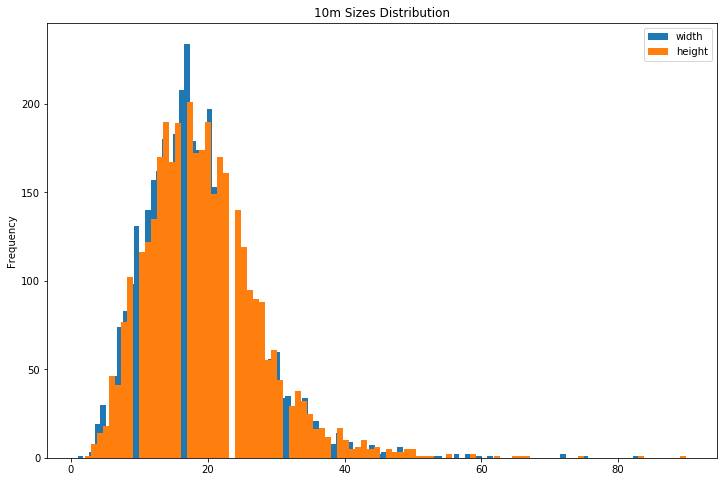

In [11]:
band = 'B02'
analyse_shapes(band)

### 20m resolution

Analysing shapes for band:  B8A
Resolution: 20m
Number of bands: 1
Raster dimensions: 5490 x 10491
Masking raster...done
Were all farms found in raster?
True
Found 3568 masks


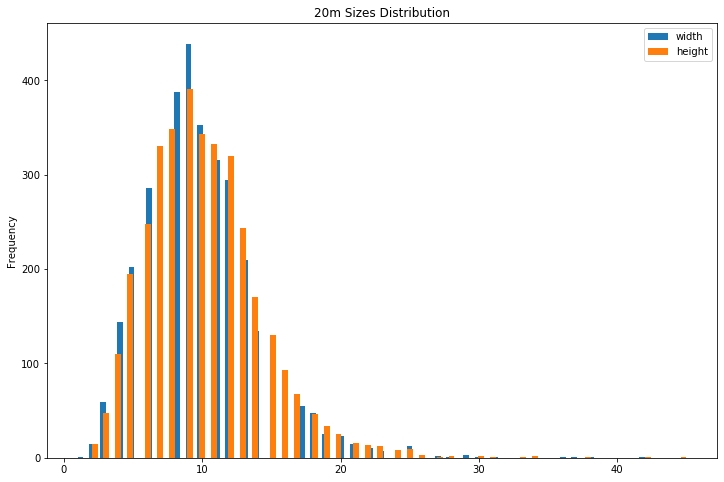

In [13]:
band = 'B8A'
analyse_shapes(band)

Analysing shapes for band:  B01
Resolution: 60m
Number of bands: 1
Raster dimensions: 1830 x 3497
Masking raster...done
Were all farms found in raster?
True
Found 3568 masks


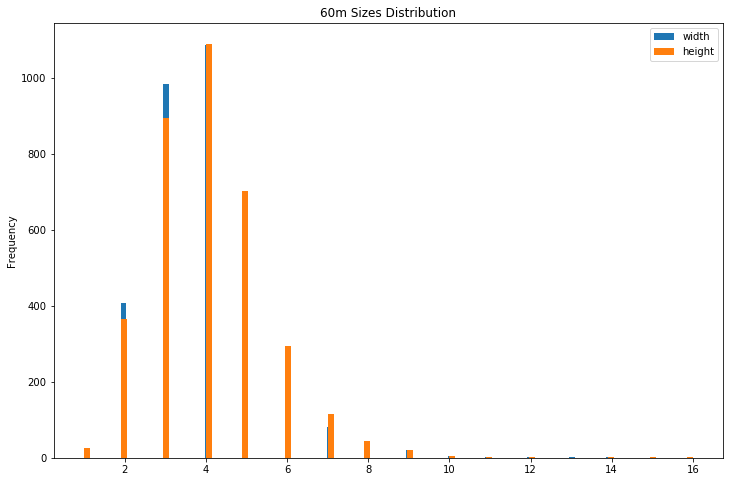

In [14]:
analyse_shapes('B01')

In [16]:
farm_masks = get_masks('B01')
farm_shapes = get_farm_shapes(farm_masks)

Number of bands: 1
Raster dimensions: 1830 x 3497
Masking raster...done
Were all farms found in raster?
True
